In [2]:
import gymnasium as gym
import numpy as np
import random

# 1. Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='rgb_array')

# Get size of state and action space
state_space_size = env.observation_space.n
action_space_size = env.action_space.n

print(f"State space size: {state_space_size}")
print(f"Action space size: {action_space_size}")

State space size: 16
Action space size: 4


In [4]:
# --- 2. Initialize Q-Table ---
# Q-table dimensions: (number of states, number of actions)
q_table = np.zeros((state_space_size, action_space_size))
print("Initial Q-Table:\n", q_table)
print(f"\nInitial Q-Table shape: {q_table.shape}")

Initial Q-Table:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Q-Table shape: (16, 4)


In [16]:
# --- 3. Define Hyperparameters ---
learning_rate = 0.9      # Alpha (α)
discount_factor = 0.95   # Gamma (γ)
epsilon = 1.0            # Epsilon for epsilon-greedy exploration
max_epsilon = 1.0        # Upper bound for epsilon
min_epsilon = 0.01       # Lower bound for epsilon
epsilon_decay_rate = 0.001 # Rate at which epsilon decays per episode

num_episodes = 2000      # Number of training episodes
max_steps_per_episode = 50 # Max steps before an episode is truncated

# Store rewards per episode for plotting later (optional, but good for tracking)
rewards_per_episode = []

In [10]:
# (Previous code blocks for imports, environment setup, Q-table, hyperparameters,
# and the outer/inner loop setup go here)

# --- 4. The Main Training Loop (Episodes) ---
print("--- Starting Q-Learning Training ---")
for episode in range(num_episodes):
    current_state, info = env.reset()
    rewards_current_episode = 0
    terminated = False
    truncated = False

    for step in range(max_steps_per_episode):
        # --- Action Selection (Epsilon-Greedy Strategy) ---
        if random.uniform(0, 1) < epsilon:
            # Explore: Choose a random action
            action = env.action_space.sample()
        else:
            # Exploit: Choose action with max Q-value for current_state
            action = np.argmax(q_table[current_state, :])


        # (Environment interaction and Q-table update will go here next)
        new_state, reward, terminated, truncated, info = env.step(action)
        if new_state == current_state: # If the agent didn't move or moved back to the same tile
            reward -= 1
        q_table[current_state,action]=q_table[current_state,action]+learning_rate*(reward+discount_factor*np.max(q_table[new_state,:])-q_table[current_state,action])
        current_state=new_state
        rewards_current_episode += reward

        if terminated or truncated:
            break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)
        rewards_per_episode.append(rewards_current_episode)




        if episode % 100 == 0: # Print every 100 episodes
        # Calculate average reward over the last 100 episodes for smoother progress tracking
          print(f"Episode {episode}: Avg reward over last 100: {np.mean(rewards_per_episode[-100:]):.2f}, Epsilon: {epsilon:.2f}")

print("--- Training Finished ---")

--- Starting Q-Learning Training ---
Episode 0: Avg reward over last 100: 0.00, Epsilon: 1.00
Episode 0: Avg reward over last 100: 0.00, Epsilon: 1.00
Episode 100: Avg reward over last 100: 0.00, Epsilon: 0.91
Episode 100: Avg reward over last 100: 0.00, Epsilon: 0.91
Episode 100: Avg reward over last 100: 0.00, Epsilon: 0.91
Episode 100: Avg reward over last 100: 0.00, Epsilon: 0.91
Episode 200: Avg reward over last 100: 0.00, Epsilon: 0.82
Episode 300: Avg reward over last 100: 0.00, Epsilon: 0.74
Episode 300: Avg reward over last 100: 0.00, Epsilon: 0.74
Episode 300: Avg reward over last 100: 0.00, Epsilon: 0.74
Episode 300: Avg reward over last 100: 0.00, Epsilon: 0.74
Episode 300: Avg reward over last 100: 0.00, Epsilon: 0.74
Episode 300: Avg reward over last 100: 0.00, Epsilon: 0.74
Episode 400: Avg reward over last 100: 0.00, Epsilon: 0.67
Episode 400: Avg reward over last 100: 0.00, Epsilon: 0.67
Episode 400: Avg reward over last 100: 0.00, Epsilon: 0.67
Episode 400: Avg reward

  Step 3: Action: 3, Reward: 0.0, New State: 0


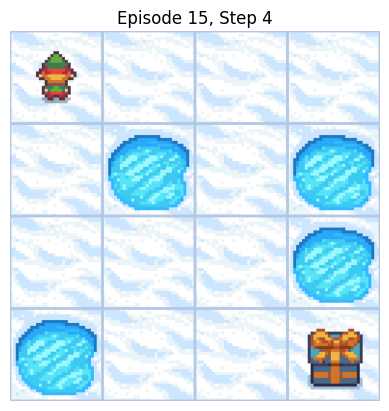

KeyboardInterrupt: 

In [17]:
# (All previous code blocks for imports, environment setup, Q-table, hyperparameters,
# and the full training loop go here)
import matplotlib.pyplot as plt
from IPython import display as ipd
# --- 5. Evaluation with Simple Visualization ---
print("\n--- Evaluating Trained Agent (Pure Exploitation with Visualization) ---")

total_successful_episodes = 0 # To count how many times the agent reaches the goal
num_eval_episodes = 15        # Run fewer episodes for visualization to keep it quick

# Set epsilon to 0 for pure exploitation during evaluation
# The agent will now always choose the action with the highest Q-value
epsilon = 0.2

# These imports were already added in an earlier step, but listed here for context
# import matplotlib.pyplot as plt
# from IPython import display as ipd

for episode in range(num_eval_episodes):
    state, info = env.reset() # Start a new evaluation episode
    print(f"\nEvaluation Episode {episode + 1}")

    for step in range(max_steps_per_episode):
        # Choose action greedily (exploit learned Q-values)
        # No random actions during evaluation
        action = np.argmax(q_table[state, :])

        # Take action in the environment
        new_state, reward, terminated, truncated, info = env.step(action)

        # --- Capture and display frame for visualization ---
        frame = env.render() # Get the RGB array of the current environment state
        if frame is not None: # Ensure a frame was returned
            plt.imshow(frame) # Display the image
            plt.axis('off')   # Hide axes for cleaner display
            plt.title(f"Episode {episode + 1}, Step {step+1}") # Add a title
            plt.show()        # Make sure the plot is drawn

            plt.pause(0.15)    # Pause for 0.2 seconds (adjust this value to control speed)

            # Clear the previous plot from the Colab output to create animation effect
            ipd.clear_output(wait=True)

        print(f"  Step {step+1}: Action: {action}, Reward: {reward}, New State: {new_state}")

        state = new_state # Update current state to the new state

        # Check if the episode ended (goal reached, fell in hole, or max steps)
        if terminated or truncated:
            if terminated and reward == 1.0: # Check if goal was reached (successful)
                total_successful_episodes += 1
                print("  Goal Reached! :)")
            else:
                print("  Episode Ended (Failed/Truncated). :(")
            break # End of current evaluation episode

# --- Final Cleanup ---
env.close() # Close the environment

# --- Final Results ---
print(f"\n--- Evaluation Complete ---")
print(f"Agent reached goal in {total_successful_episodes}/{num_eval_episodes} evaluation episodes.")
print("\nFinal Q-Table:\n", np.round(q_table, 2))

In [13]:
print(q_table)

[[2.83983251e-01 1.98674927e-01 1.75394899e-01 2.95843781e-01]
 [6.29549694e-03 9.84646649e-05 1.72798316e-02 1.52798538e-01]
 [5.73854799e-03 2.51003685e-03 1.51032116e-02 1.43198276e-01]
 [2.37515555e-03 1.46377454e-02 2.40662602e-03 1.25299778e-01]
 [3.14015681e-01 4.45897376e-02 4.72660652e-02 1.06901850e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.65962902e-05 5.05180844e-05 3.51098538e-03 3.26783850e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.59877161e-02 6.54779073e-02 4.08283912e-02 5.24050722e-01]
 [3.38559885e-06 5.67234245e-01 5.78016689e-02 1.71392634e-01]
 [5.93974897e-01 1.31854483e-03 3.14437472e-03 8.60480287e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.22300049e-03 6.88904180e-04 9.21192637e-01 5.85532887e-01]
 [3.40595577e-01 9.99537716e-01 6.93664507e-01 1.46429636e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [27]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display as ipd

# 1. Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

state_space_size = env.observation_space.n
action_space_size = env.action_space.n

# 2. Initialize Q-Table
q_table = np.zeros((state_space_size, action_space_size))

# 3. Define Hyperparameters
learning_rate = 0.9
discount_factor = 0.95
epsilon = 1.0            # Starts high for exploration
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.001

# --- IMPORTANT: Reverted num_episodes for proper training ---
num_episodes = 2000 # Increased for better learning in slippery environment
max_steps_per_episode = 50

# --- Visualization Frequency ---
# Visualize only every N episodes during training (e.g., every 500 episodes)
VISUALIZE_EVERY_N_EPISODES = 200

rewards_per_episode = []

# --- 4. The Main Training Loop (Visualization on a Schedule) ---
print("--- Starting Q-Learning Training ---")
for episode in range(num_episodes):
    current_state, info = env.reset()
    rewards_current_episode = 0
    terminated = False
    truncated = False

    previous_state = current_state

    for step in range(max_steps_per_episode):
        # Action Selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore
        else:
            action = np.argmax(q_table[current_state, :]) # Exploit

        # Take Action & Observe
        new_state, reward, terminated, truncated, info = env.step(action)

        # --- Modify Reward for self-loop ---
        if new_state == current_state:
            reward -= 1 # Apply a penalty for staying in the same box

        if truncated:
          reward -=5



        if new_state == 15:
          reward +=10
        if terminated and reward>5:
          reward +=10
        elif terminated:
          reward -=5

        # --- Conditional Visualization during Training ---
        if episode % VISUALIZE_EVERY_N_EPISODES == 0:
            frame = env.render()
            if frame is not None:
                plt.imshow(frame)
                plt.axis('off')
                plt.title(f"Training Ep: {episode+1}/{num_episodes}, Step: {step+1}\nEpsilon: {epsilon:.2f}")
                plt.show()
                plt.pause(0.05) # Shorter pause for less interruption
                ipd.clear_output(wait=True)
        # --- End Conditional Visualization ---

        # Update Q-Table
        q_table[current_state, action] = q_table[current_state, action] + \
                                         learning_rate * \
                                         (reward + discount_factor * np.max(q_table[new_state, :]) - q_table[current_state, action])

        rewards_current_episode += reward
        current_state = new_state
        previous_state = current_state

        if terminated or truncated:
            break

    # Epsilon Decay
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

    # Log Rewards per Episode
    rewards_per_episode.append(rewards_current_episode)

    # Print progress periodically
    if episode % 100 == 0:
        print(f"Episode {episode}: Avg reward over last 100: {np.mean(rewards_per_episode[-100:]):.2f}, Epsilon: {epsilon:.2f}")

print("--- Training Finished ---")


# --- 5. Final Evaluation with Visualization (Pure Exploitation) ---
print("\n--- Evaluating Trained Agent (Pure Exploitation with Visualization) ---")

total_successful_episodes = 0
num_eval_episodes = 5 # Run a few episodes to see final behavior

# Set epsilon to 0 for pure exploitation during evaluation
epsilon_eval = 0.0 # Use a separate epsilon variable for clarity in evaluation

for episode in range(num_eval_episodes):
    state, info = env.reset()
    print(f"\nEvaluation Episode {episode + 1}")

    previous_state = state

    for step in range(max_steps_per_episode):
        # Choose action greedily (exploit learned Q-values)
        action = np.argmax(q_table[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        # --- Apply the same reward modification rule during evaluation ---
        if new_state == current_state:
            reward -= 1 # Apply a penalty for staying in the same box

        if truncated:
          reward -=5



        if new_state == 15:
          reward +=10
        if terminated and reward>5:
          reward +=10
        elif terminated:
          reward -=5

        frame = env.render()
        if frame is not None:
            plt.imshow(frame)
            plt.axis('off')
            plt.title(f"Evaluation Ep: {episode + 1}, Step {step+1}")
            plt.show()
            plt.pause(0.1) # Longer pause to observe clearly
            ipd.clear_output(wait=True)

        print(f"  Step {step+1}: Action: {action}, Reward: {reward}, New State: {new_state}")

        state = new_state
        previous_state = state

        if terminated or truncated:
            if terminated and reward >= 0: # Check if goal was reached or at least no negative outcome
                total_successful_episodes += 1
                print("  Goal Reached! :)")
            else:
                print("  Episode Ended (Failed/Truncated). :(")
            break

# --- Final Cleanup ---
env.close()

# --- Final Results ---
print(f"\n--- Evaluation Complete ---")
print(f"Agent reached goal in {total_successful_episodes}/{num_eval_episodes} evaluation episodes.")
print("\nFinal Q-Table:\n", np.round(q_table, 2))

  Step 6: Action: 2, Reward: 20.0, New State: 15
  Goal Reached! :)

--- Evaluation Complete ---
Agent reached goal in 5/5 evaluation episodes.

Final Q-Table:
 [[14.44 16.25 16.25 14.44]
 [15.44 -5.   17.1  15.25]
 [16.25 18.   16.25 16.1 ]
 [17.1  -5.   15.25 15.25]
 [15.25 17.1  -5.   15.44]
 [ 0.    0.    0.    0.  ]
 [-5.   18.95 -5.   17.1 ]
 [ 0.    0.    0.    0.  ]
 [16.1  -5.   18.   16.25]
 [17.1  18.95 18.95 -5.  ]
 [18.   19.95 -5.   18.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-5.   17.95 19.95 18.  ]
 [18.95 18.95 21.   18.95]
 [ 0.    0.    0.    0.  ]]
